<a href="https://colab.research.google.com/github/Moinuddinsk01/CodeWay-Tasks/blob/main/SPAM_SMS_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [38]:
data = pd.read_csv("/content/spam.csv", encoding='latin-1')

Performing to EDA to get insights from the data.

In [39]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [40]:
data.shape

(5572, 5)

In [41]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

As most of the values are null in Unnamed: 2, Unnamed: 3, Unnamed: 4, so I am removing them from the data that too they are not that essential in detecting spam or not.

In [42]:
data = data[["v1","v2"]]

In [43]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [44]:
data.rename(columns = {"v1":"Label", "v2":"Text"}, inplace = True)

<ipython-input-44-2e636d77c1f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns = {"v1":"Label", "v2":"Text"}, inplace = True)


In [45]:
data.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [46]:
data['Label'] = data['Label'].map({'ham': 0, 'spam': 1})
# from sklearn.preprocessing import LabelEncoder
# en = LabelEncoder()
# data.Label = en.fit_transform(data.Label)

<ipython-input-46-63871b1a884b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Label'] = data['Label'].map({'ham': 0, 'spam': 1})


In [47]:
data.head()

,Label,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   5572 non-null   int64 
 1   Text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [49]:
data.describe()

,Label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


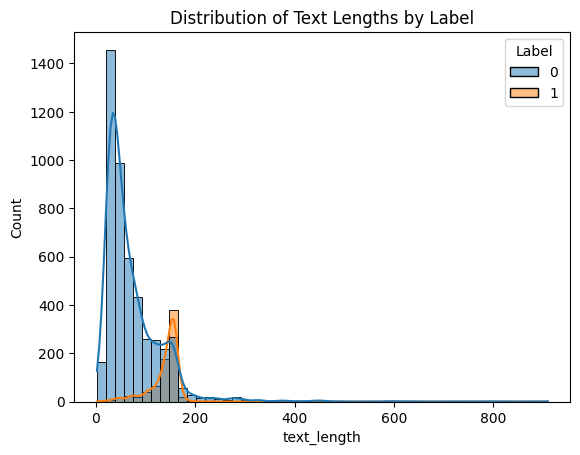

In [55]:
# Visualize the distribution of text lengths for spam and ham messages
data['text_length'] = data['Text'].apply(len)
sns.histplot(data=data, x='text_length', hue='Label', kde=True, bins=50)
plt.title('Distribution of Text Lengths by Label')
plt.show()

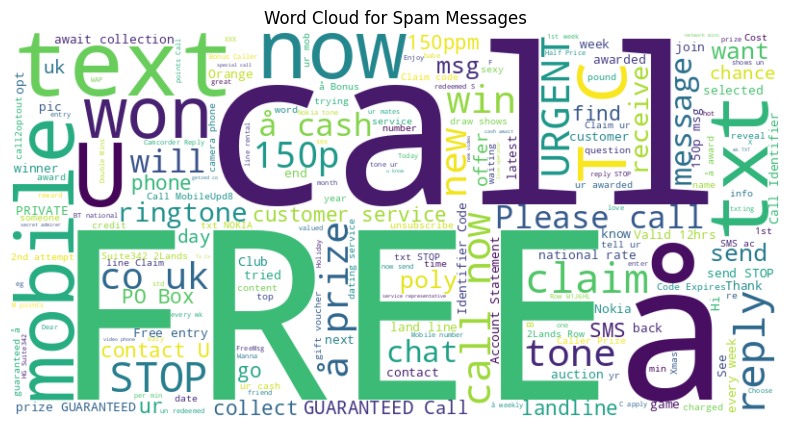

In [59]:
# Word cloud for spam messages
from wordcloud import WordCloud

spam_words = ' '.join(data[data['Label'] == 1]['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()

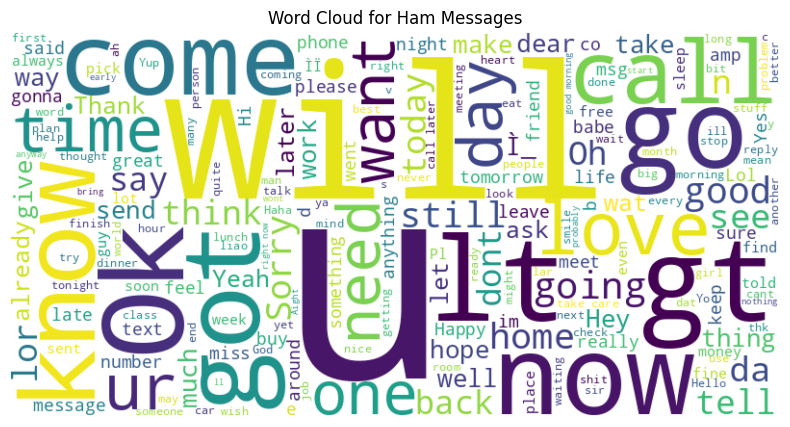

In [60]:
# Word cloud for ham messages
ham_words = ' '.join(data[data['Label'] == 0]['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Messages')
plt.show()

The above are the word clouds for spam and ham messages.

In [62]:
X = data['Text']
y = data['Label']

In [63]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Feature Extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

In [65]:
# Naive Bayes
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_tfidf, y_train)
naive_bayes_predictions = naive_bayes_model.predict(X_test_tfidf)

In [66]:
# Logistic Regression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_tfidf, y_train)
logistic_regression_predictions = logistic_regression_model.predict(X_test_tfidf)

In [67]:
# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)
svm_predictions = svm_model.predict(X_test_tfidf)

In [68]:
# Model Evaluation
def evaluating_model(model, predictions):
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy_score(y_test, predictions)}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("Classification Report:")
    print(classification_report(y_test, predictions))

In [70]:
# Evaluating each model
evaluating_model(naive_bayes_model, naive_bayes_predictions)
print("---------------------")
evaluating_model(logistic_regression_model, logistic_regression_predictions)
print("---------------------")
evaluating_model(svm_model, svm_predictions)

Model: MultinomialNB
Accuracy: 0.9721973094170404
Confusion Matrix:
[[965   0]
 [ 31 119]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.79      0.88       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115

---------------------
Model: LogisticRegression
Accuracy: 0.957847533632287
Confusion Matrix:
[[962   3]
 [ 44 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.97      0.71      0.82       150

    accuracy                           0.96      1115
   macro avg       0.96      0.85      0.90      1115
weighted avg       0.96      0.96      0.95      1115

---------------------
Model: SVC
Accuracy: 0.9766816143497757
Confusion Matrix:
[[964   1]
 

Among `[MultinomialNB, LogisticRegression, SVM]`, `SVM` works well for spam detection.